# Proyek 1 ML Terapan, Klasifikasi Gambar: Penyakit Kentang Dataset]
- **Nama:** [Riffa Bella Wahyu S]
- **Email:** [mc444d5x0776@student.devacademy.id]
- **ID Dicoding:** [MC444D5X0776]

## Data Understanding

Pada proyek ini menggunakan dataset dari [Kaggle - House Price Prediction Dataset](https://www.kaggle.com/datasets/zafarali27/house-price-prediction-dataset/data) Berisi 2000 baris, yang terdiri 9 fitur yaitu fitur numerik dan fitur kategorikal.

## Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bellawahyu","key":"c8717390016d24e448984bcd4d2a94dc"}'}

In [3]:
# Mengatur dan mendownload dataset dari Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset House Price Prediction dari Kaggle
!kaggle datasets download -d zafarali27/house-price-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/zafarali27/house-price-prediction-dataset
License(s): CC0-1.0
  0% 0.00/28.7k [00:00<?, ?B/s]
100% 28.7k/28.7k [00:00<00:00, 102MB/s]


In [4]:
# Ekstrak zip dataset
!unzip house-price-prediction-dataset.zip

Archive:  house-price-prediction-dataset.zip
  inflating: House Price Prediction Dataset.csv  


In [5]:
House = pd.read_csv('House Price Prediction Dataset.csv')
House

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


**Insight:**
- Terdapat 2000 baris (record atau jumlah pengamatan) dalam dataset.
- Terdapat 10 kolom yaitu: Id, Area, Bedrooms. Bathrooms, Floors, YearBuilt, Location, Condition, Garage, dan Price.

## Exploratory Data Analysis

### Deskripsi Variabel

Berdasarkan informasi dari [Kaggle](https://www.kaggle.com/datasets/zafarali27/house-price-prediction-dataset) Varibel-variabel pada House Price Prediction Dataset adalah sebagai berikut :
*   Area : Luas bangunan rumah (dalam persegi) yang merupakan salah satu faktor paling penting dalam memprediksi harga.
*   Badrooms dan Bathrooms : Jumlah kamar (kamar tidur dan kamat mandi) dalam sebuah rumah sangat mempengaruhi nilainya. Rumah dengan lebih banyak kamar cenderung memiliki harga yang lebih tinggi.
*   Floors : Jumlah lantai pada rumah dapat menunjukkan bahwa rumah tersebut lebih besar atau mewah, sehingga berpotensi meningkatkan harganya.
*   Year Built : usia rumah dapat memepengaruhi kondisi dan nilainya. Rumah yang baru dibangun umumnya lebih mahal dibandingkan rumah yang lebih tua.
*   Location : Rumah yang berasa di lokasi strategis seperti pusat kota atau area urban cenderung memiliki harga lebih tinggi dibandingkan rumah di daerah pinggiran atau pedesaan.
*   Condition : Kondisi rumah sangat penting. Rumah yang terawat dengan baik (dalam kondisi "Excellent" atau "Good") akan memiliki harga jual lebih tinggi dibandingkan rumah dalam kondisi "Fiar" atau "Poor"
*   Garage : Ketersediaan garansi dapat meningkatkan harga rumah karena memberikan kenyamanan dan ruang tambahan
*   Price : Variabel target, yaitu harga jual rumah, yang digunakan untuk melatih model machine learning agar dapat memprediksi harga rumah berdasarkan fitur-fitur lainnya.










#### Memahami Struktur Data

In [6]:
# Melihat jumlah baris dan kolom
print(House.shape)

(2000, 10)


In [7]:
# Menampilkan jumlah baris dan kolom dalam dataset serta jenis data di setiap kolom (numerikal atau kategorikal).
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


Insight :
*   Terdapat 3 kolom dengan tipe object, yaitu: Location, Condition, dan Garage. Kolom ini merupakan categorical features (fitur non-numerik).
*   Terdapat 7 kolom numerik dengan tipe data int64, yaitu : Id, Area, Bedrooms, Bathrooms, Floors, YearBuilt, dan Price. Dengan satu kolom yaitu Price merupakan target fitur.



In [8]:
# Menampilkan parameter statistik deskriptif dari dataset untuk kolom numerik
House.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [9]:
# Menangani Duplikasi Data
print(House.duplicated().sum())

0


### Pengecekkan Missing Value

In [10]:
# Memeriksa nilai yang hilang di dalam DataFrame
House.isna()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False


In [11]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
print(House.isnull().sum())

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


**Insight:** Tidak ada missing value di dalam DataFrame maupun di setiap kolom

### Pengecekkan Outliers

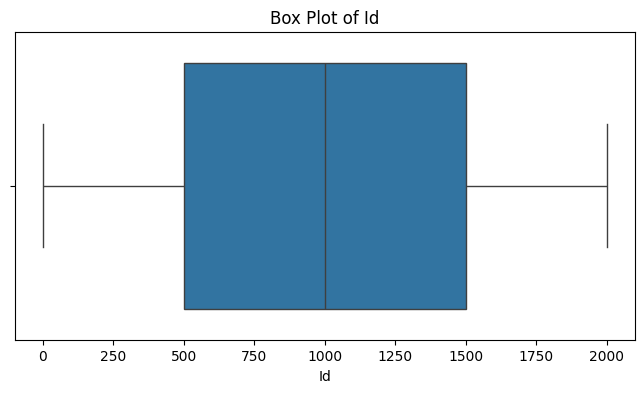

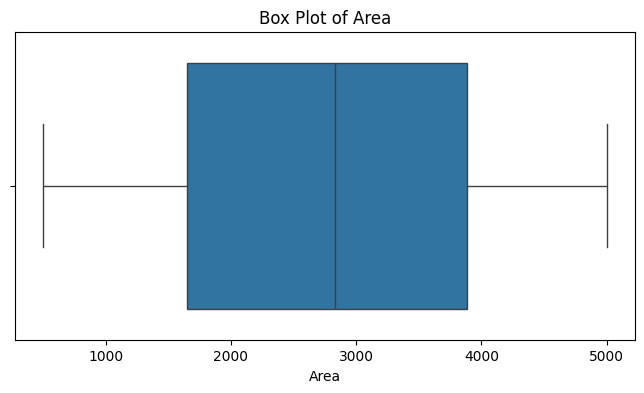

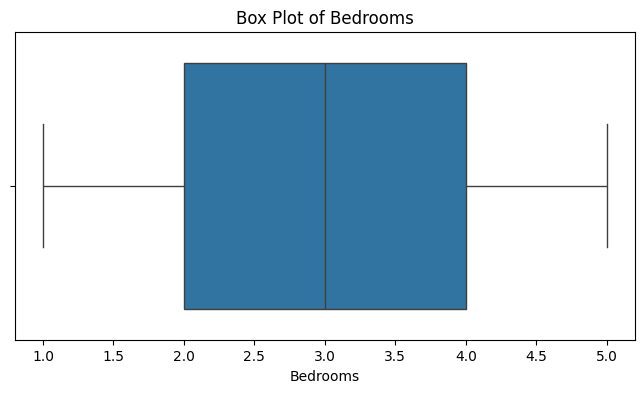

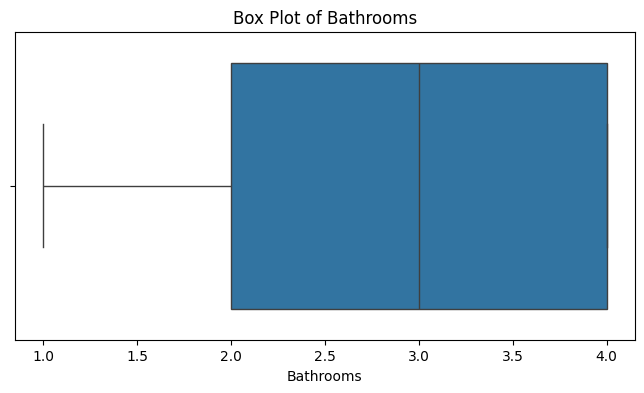

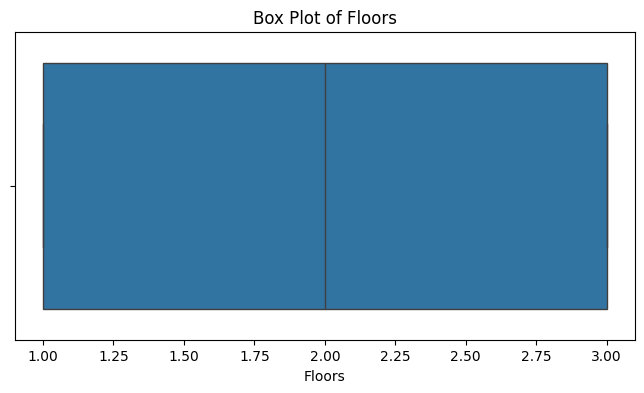

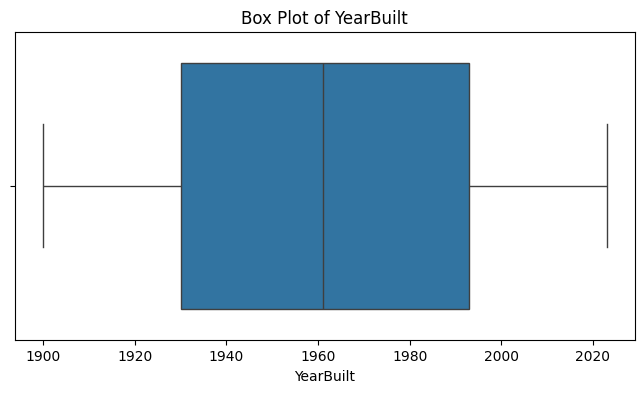

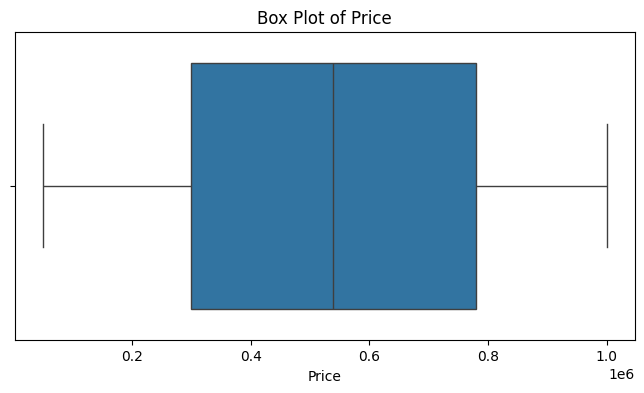

In [12]:
# Mendefinisikan kolom numerik dari DataFrame df
numeric_cols = House.select_dtypes(include=['int64']).columns

# mendeteksi/melihat outlier dengan boxplot
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=House[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

**Insight :** Hasil pengecekan outlier pada kolom numerik menunjukkan bahwa tidak masing-masing kolom tidak menampilkan outliers.

### Univariate Analysis

In [13]:
numerical_features = ['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
categorical_features = ['Location', 'Condition', 'Garage']

#### Categorical Features

##### Fitur Location

          jumlah sampel  persentase
Location                           
Downtown            558        27.9
Urban               485        24.2
Suburban            483        24.2
Rural               474        23.7


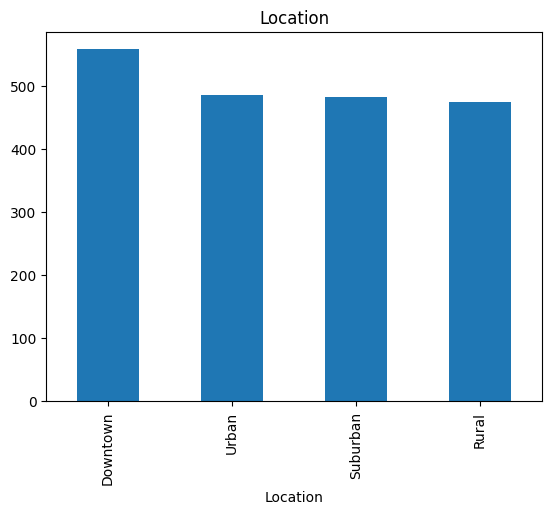

In [14]:
feature = categorical_features[0]
count = House[feature].value_counts()
percent = 100*House[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Insight :** Terdapat 4 kategori pada fitur Location, secara berurutan dari jumlah yang paling banyak yaitu: Downtown, Urban, Suburban, Rural. Dari data presentase dapat disimpulkan bahwa lebih dari 75% sampel merupakan rumah yang berada di lokasi Downtown, Urban, dan Suburban.

##### Fitur Condition

           jumlah sampel  persentase
Condition                           
Fair                 521        26.0
Excellent            511        25.6
Poor                 507        25.4
Good                 461        23.0


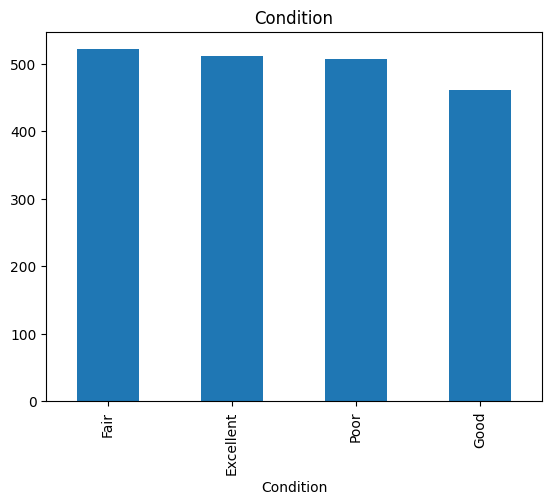

In [15]:
feature = categorical_features[1]
count = House[feature].value_counts()
percent = 100*House[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Insight:** Terdapat 4 kategori pada fitur Condition, secara berurutan dari jumlah yang paling banyak yaitu Fair, Excellent, Poor, dan Good. Dengan mayoritas rumah dalam sampel memiliki kondisi menengah ke atas yaitu Fair (26%).

##### Fitur Garage

        jumlah sampel  persentase
Garage                           
No               1038        51.9
Yes               962        48.1


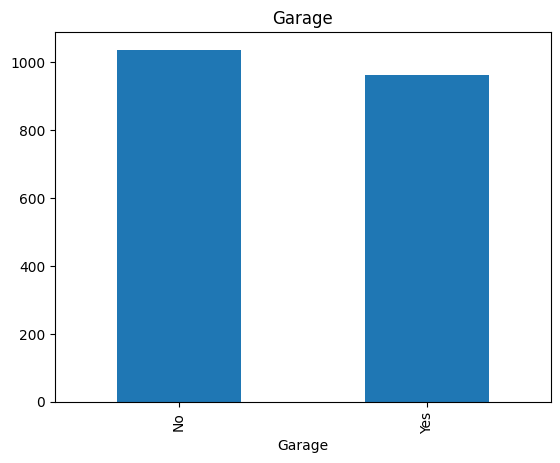

In [16]:
feature = categorical_features[2]
count = House[feature].value_counts()
percent = 100*House[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

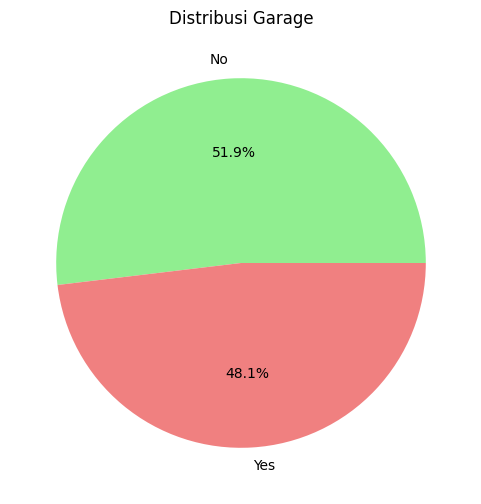

In [17]:
# Pie Chart - Distribusi Garage
plt.figure(figsize=(6, 6))
House['Garage'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen','lightcoral'])
plt.title('Distribusi Garage')
plt.ylabel('')  # Menghilangkan label default
plt.show()

**Insight:** Terdapat 2 kategori pada fitur Garage, secara berurutan dari jumlah yang paling banyak yaitu No, dan Yes. Dengan mayoritas rumah pada sampel tidak memiliki garansi didalamnya.

#### Numerical Features

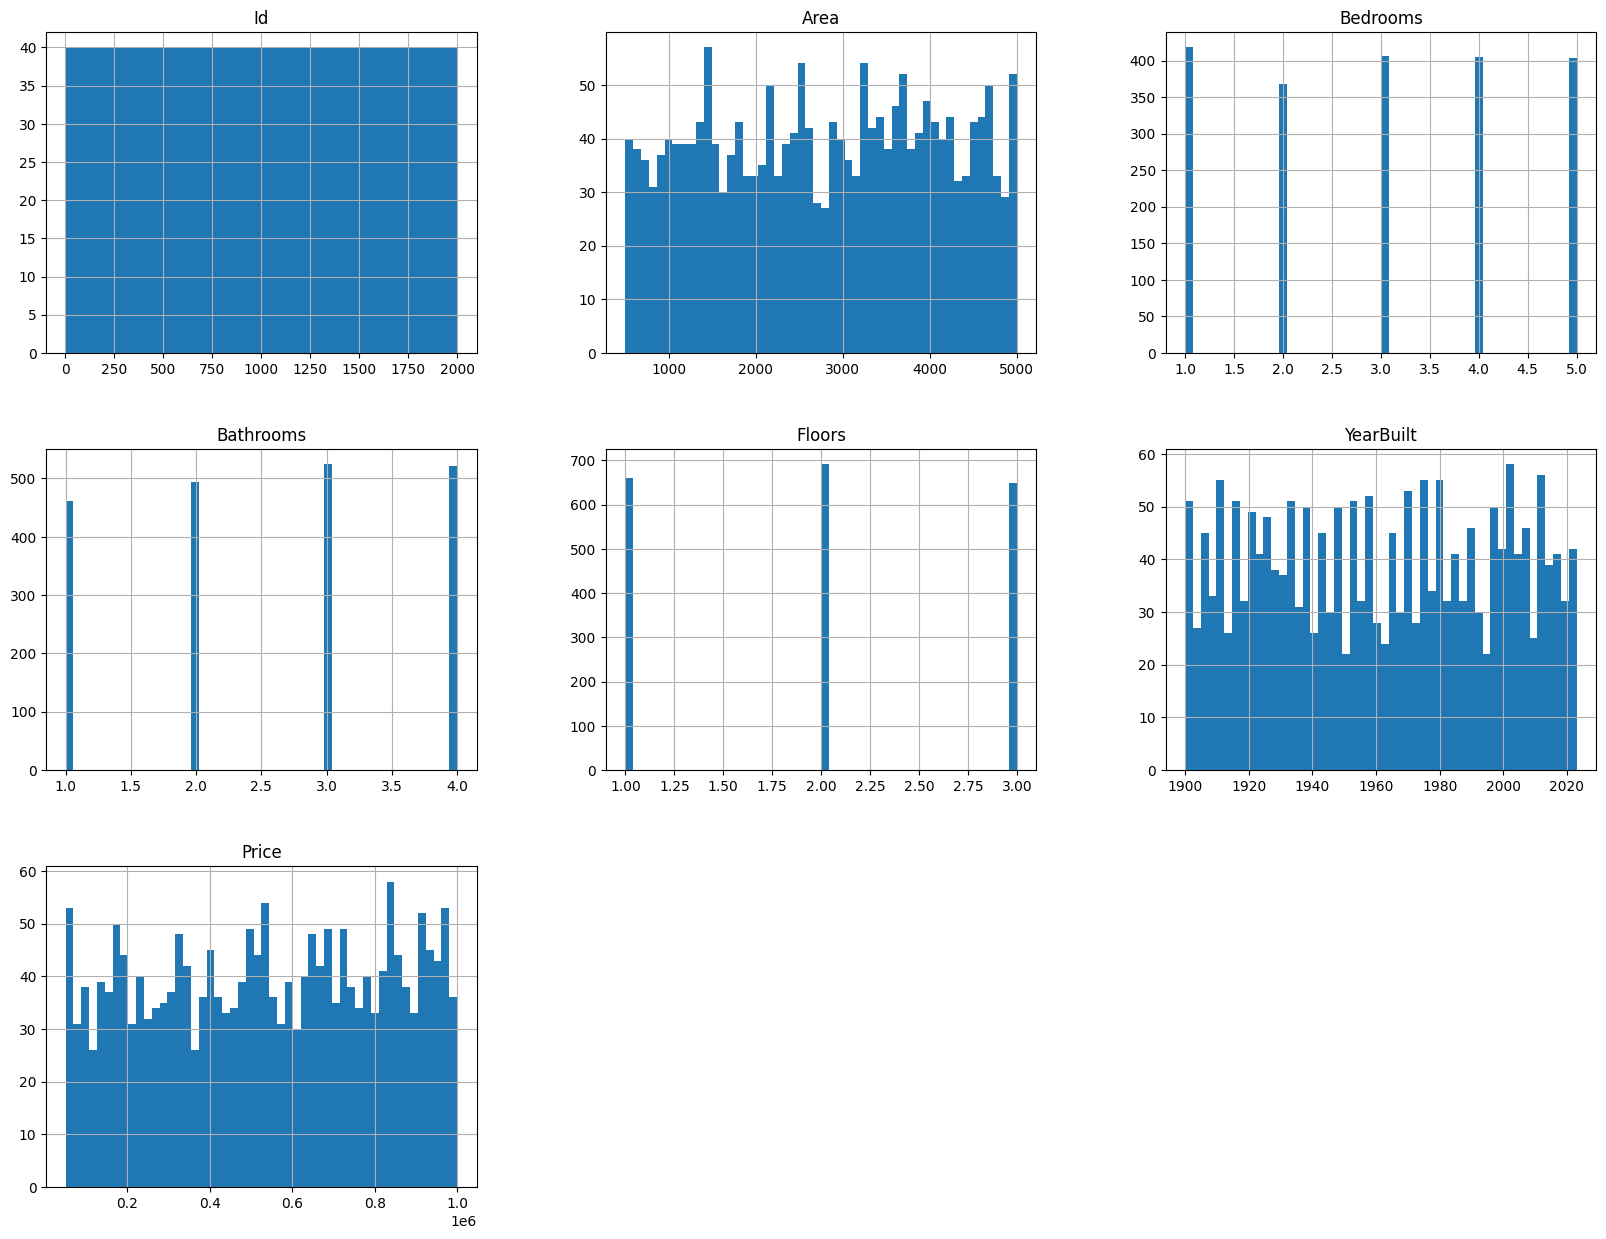

In [18]:
House.hist(bins=50, figsize=(20,15))
plt.show()

**Insight:** Pada diagram histogram diatas, khususnya untuk variabel "Price" yang merupakan fitur target, memperoleh informasi sebagi berikut":

**Price** (fitur target) : Distribusi harga rumah yang cukup merata tanpa puncak mencolok, dan harga rumah berada dalam rentang 50.000 hingga 1.000.000. Sehingga menunjukkan variasi dari rumah sederhana hingga rumah mewah.




### Multivariate Analysis

#### Categorical Features

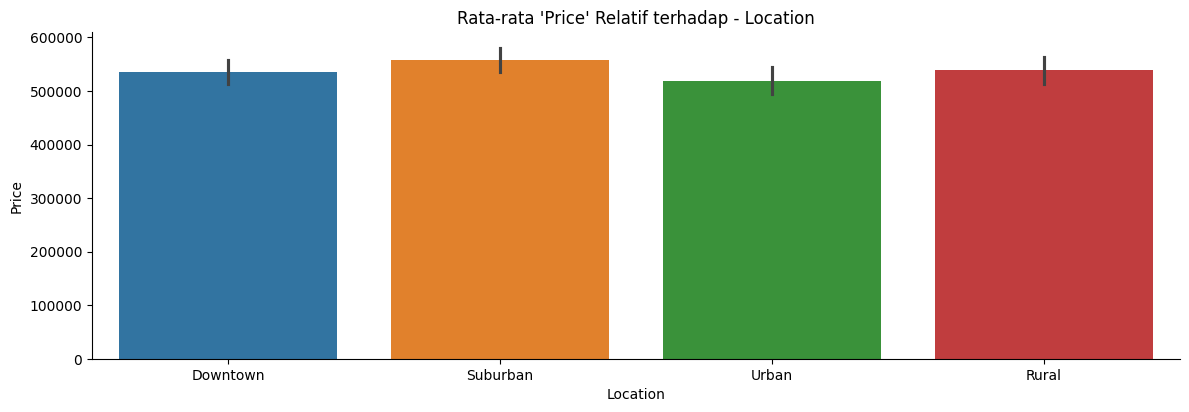

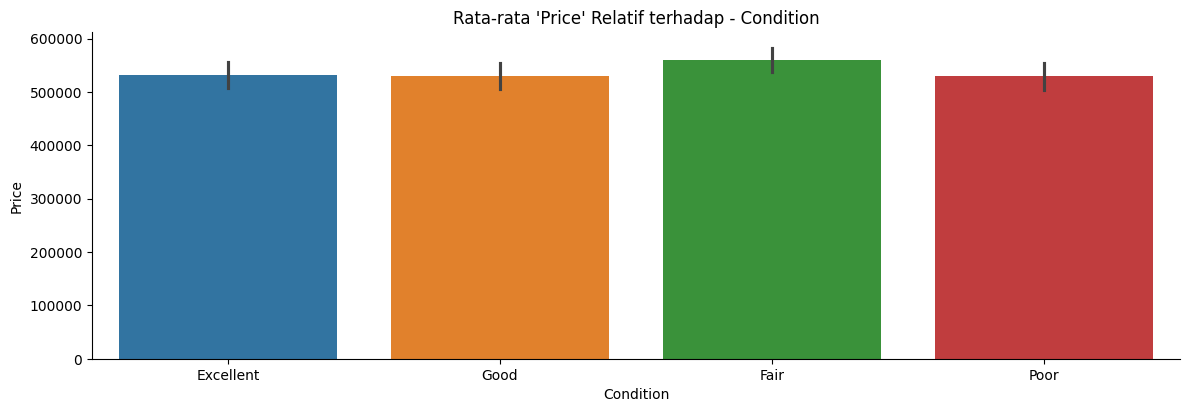

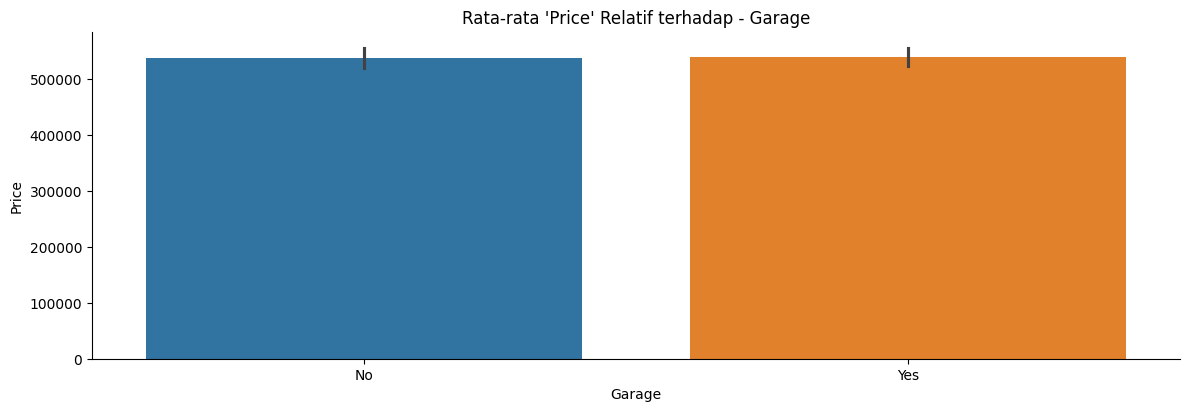

In [19]:
cat_features = House.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Price", hue=col, kind="bar", dodge=False, height = 4, aspect = 3,  data=House, legend=False)
  plt.title("Rata-rata 'Price' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori diatas, diperoleh insight sebagai berikut:
*   Pada fitur **Location**, rata-rata harga rumah relatih sama di keempat lokasi. Dengan lokasi Suburban memiliki rata-rata harga tertinggi diatas lokasi lain, dan untuk rata-rata harga yang sedikit lebih rendah pada lokasi Urban. Rata-rata harga rumah berdasarkan location nya berkisar antara 520.000 hingga 560.000.
*   Pada fitur **Condition**, rata-rata harga rumah relatif sama diantara keempat kategori kondisi. Dengan kondisi Fair memiliki rata-rata harga tertinggi, sedikit diatas kategori lainnya.
*   Pada fitur **Garage**, rata-rata harga rumah dengan atau tanpa garansi terlihat sangat mirip, berada di sekitar angka 540.000-an.
*   Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.



#### Numerical Features

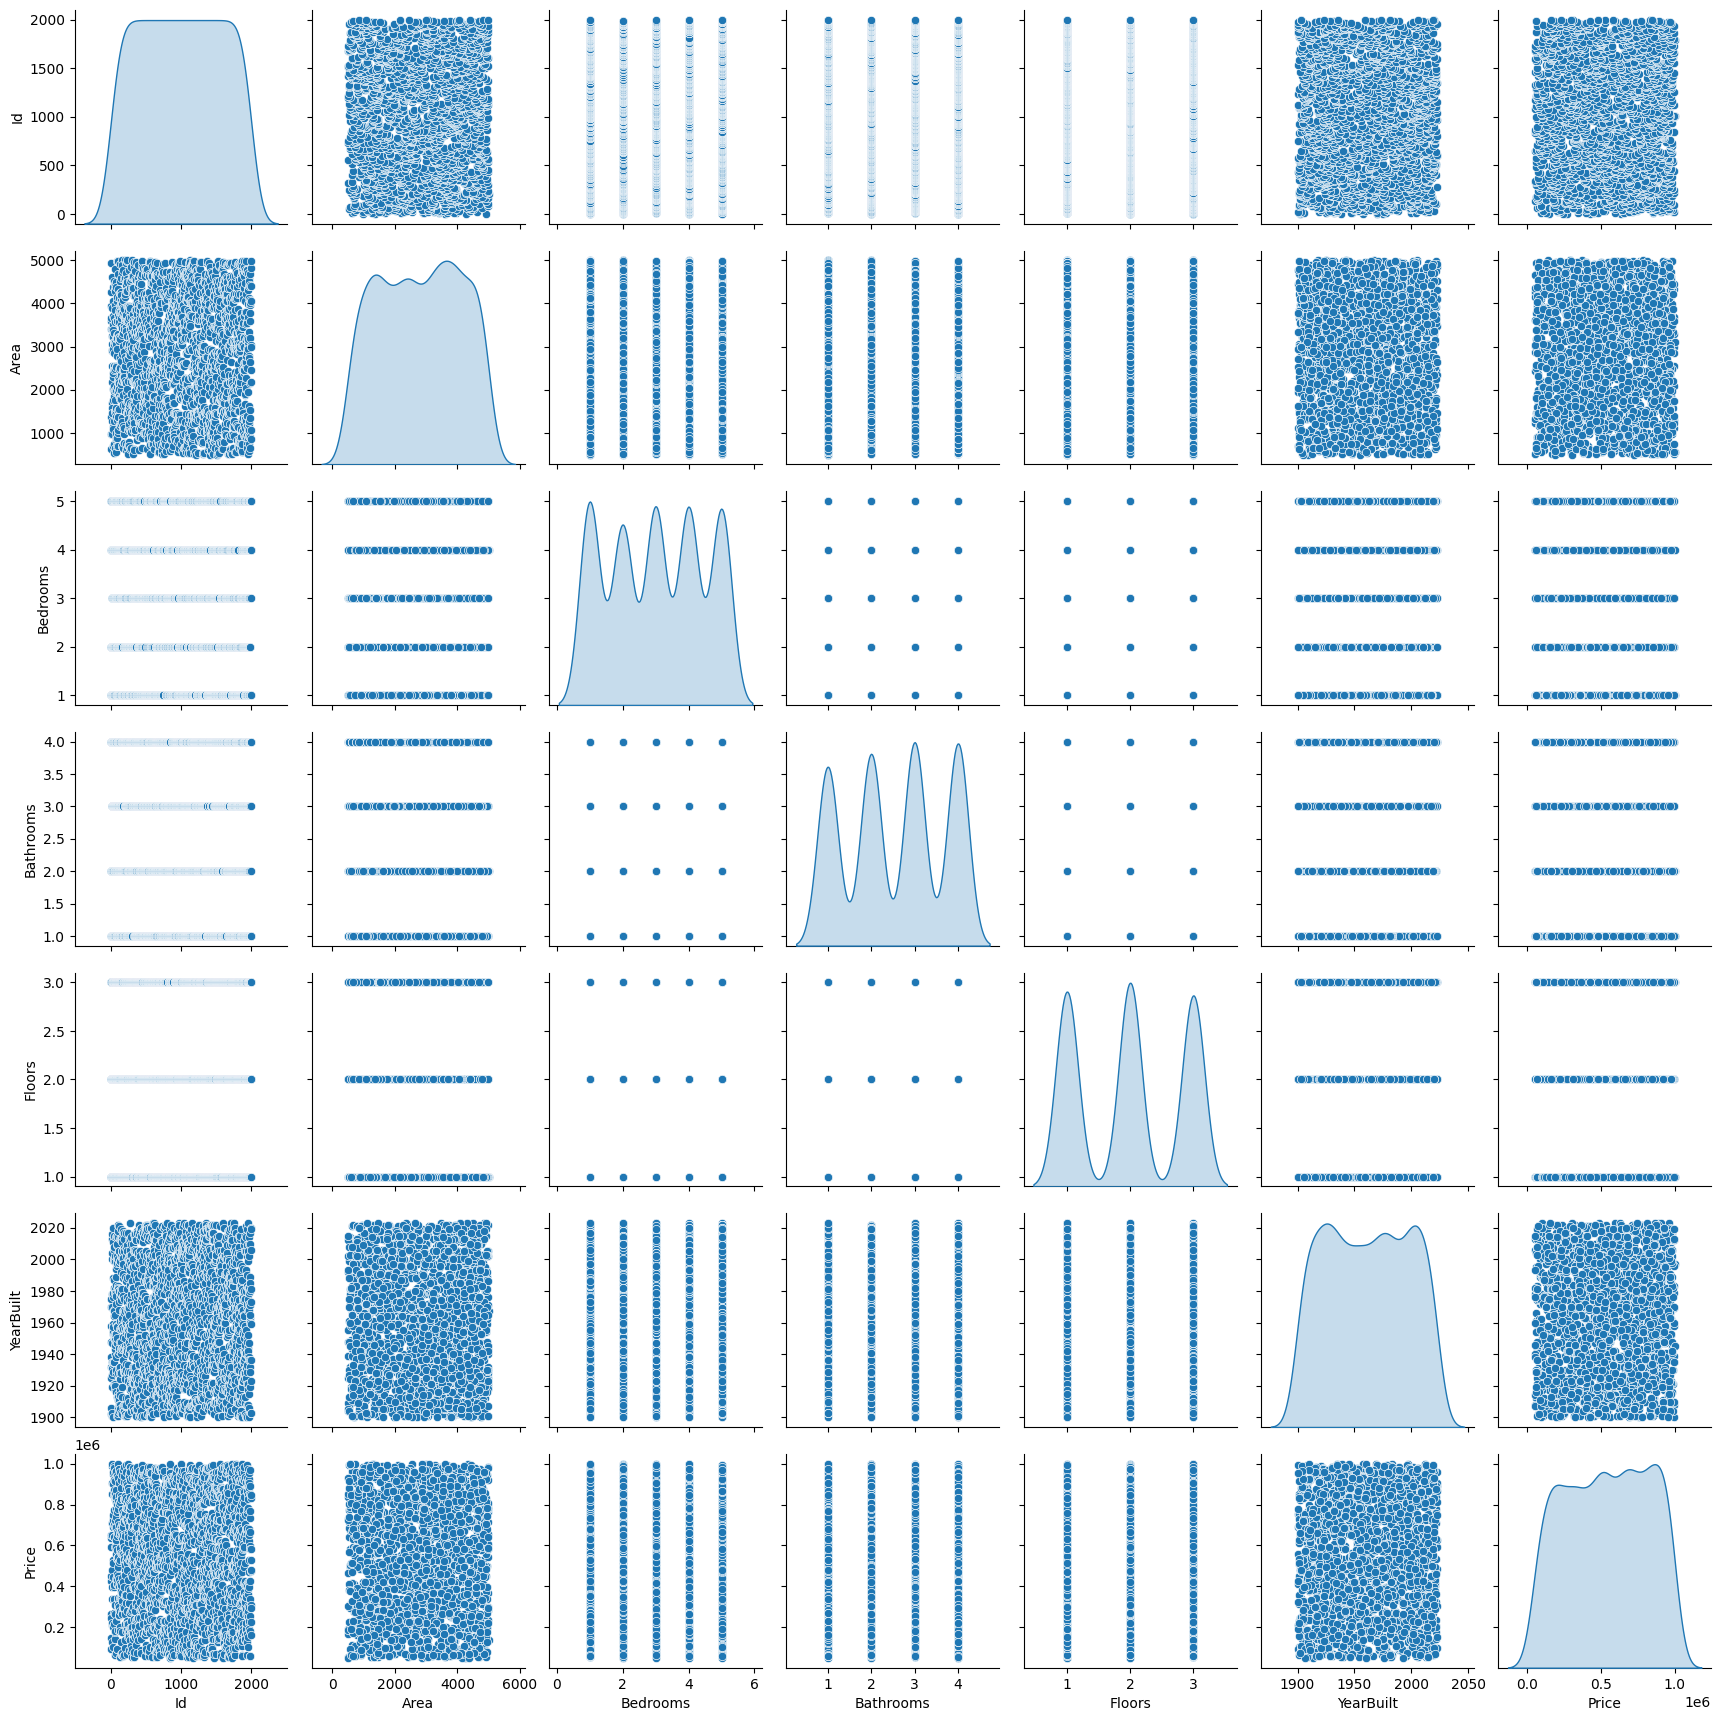

In [20]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(House, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

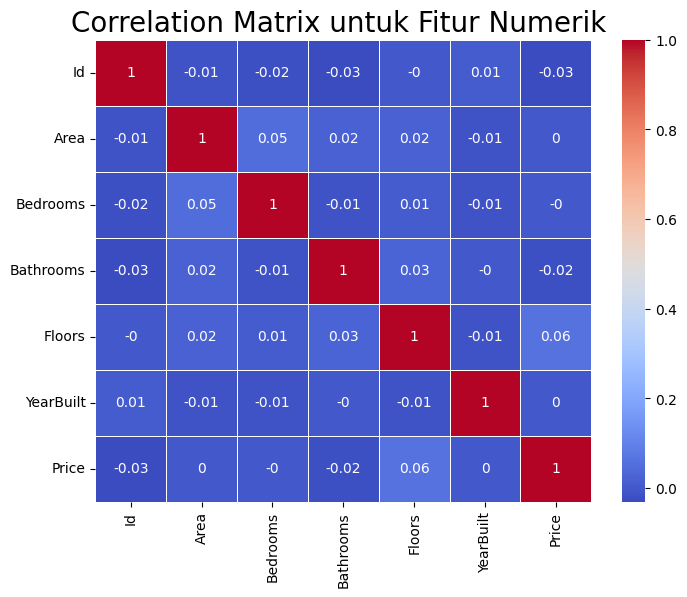

In [21]:
plt.figure(figsize=(8, 6))
correlation_matrix = House[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan matriks korelasi, semua fitur numerik dalam dataset memiliki korelasi yang sangat lemah terhadap harga rumah (Price). Nilai korelasinya berada di sekitar nol, yang menunjukkan tidak ada hubungan linear yang kuat antara fitur-fitur seperti Area, Bedrooms, Bathrooms, Floors, dan YearBuilt dengan Price.

## Data Preparation

### Encoding Fitur Kategori

In [22]:
from sklearn.preprocessing import  OneHotEncoder

# Mengubah data kategorikal menjadi numerik
House = pd.concat([House, pd.get_dummies(House['Location'], prefix='Location', dtype='int64')],axis=1)
House = pd.concat([House, pd.get_dummies(House['Condition'], prefix='Condition',dtype='int64')],axis=1)
House = pd.concat([House, pd.get_dummies(House['Garage'], prefix='Garage', dtype='int64')],axis=1)
House.drop(['Location','Condition','Garage'], axis=1, inplace=True)
House.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Garage_No,Garage_Yes
0,1,1360,5,4,3,1970,149919,1,0,0,0,1,0,0,0,1,0
1,2,4272,5,4,3,1958,424998,1,0,0,0,1,0,0,0,1,0
2,3,3592,2,2,3,1938,266746,1,0,0,0,0,0,1,0,1,0
3,4,966,4,2,2,1902,244020,0,0,1,0,0,1,0,0,0,1
4,5,4926,1,4,2,1975,636056,1,0,0,0,0,1,0,0,0,1


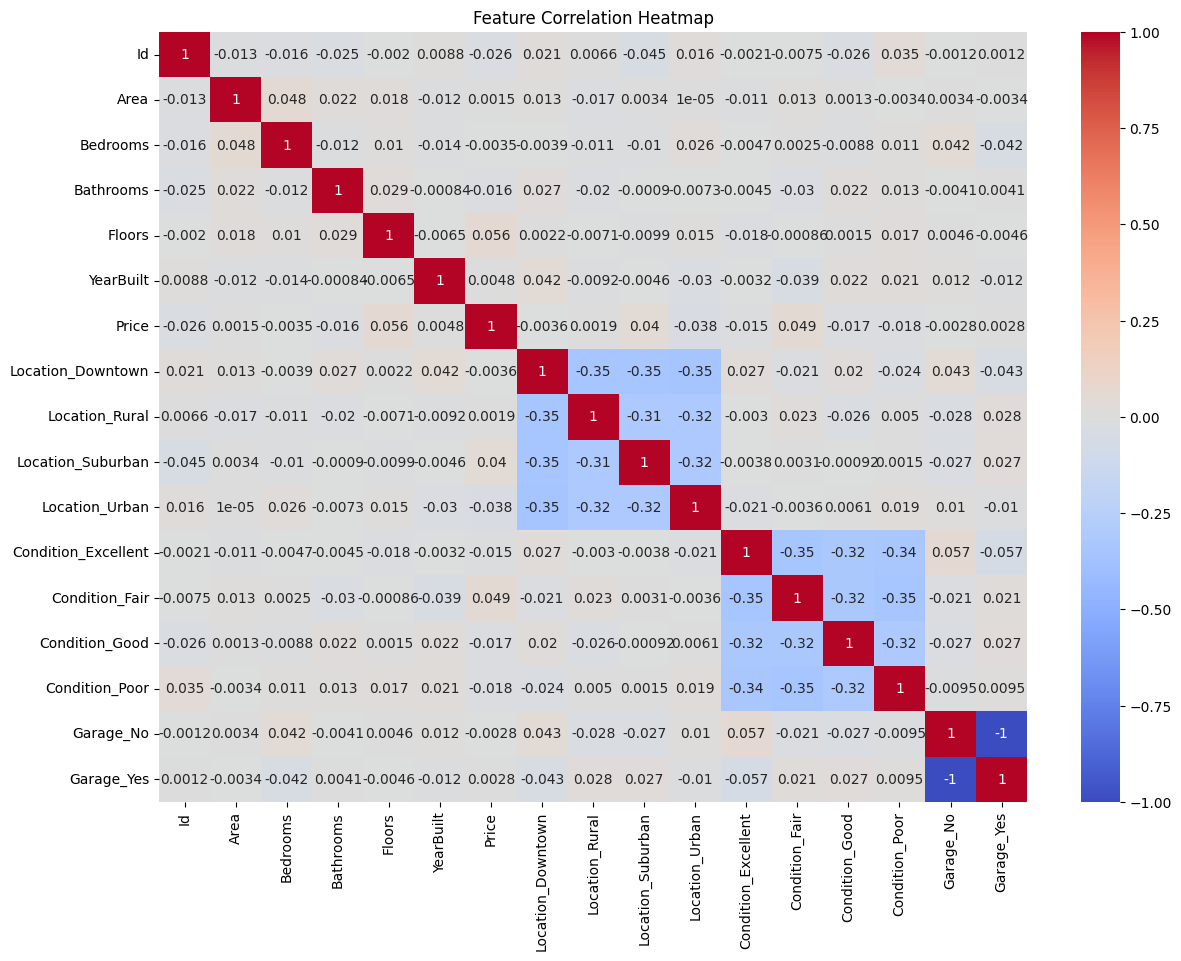

In [23]:
# Melihat correlation antar semua fitur
plt.figure(figsize=(14, 10))
sns.heatmap(House.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Train-Test-Split

In [24]:
from sklearn.model_selection import train_test_split

X = House.drop(["Price"],axis =1)
y = House["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Membagi data train dan test menjadi 80:20, dimana 80% untuk pelatihan dan 20% untuk pengujian

In [25]:
# mengecek jumlah sampel pada masing-masing bagian
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2000
Total # of sample in train dataset: 1600
Total # of sample in test dataset: 400


### Standarisasi

In [26]:
from sklearn.preprocessing import StandardScaler

numeric_feature = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']

scaler = StandardScaler()

X_train[numeric_feature] = scaler.fit_transform(X_train[numeric_feature])
X_test[numeric_feature] = scaler.transform(X_test[numeric_feature])

print("\nSample scaled data:\n", X_train.head())


Sample scaled data:
       Id      Area  Bedrooms  Bathrooms    Floors  YearBuilt  \
968  969  1.314081  0.685758   1.316088  1.242260  -0.808673   
240  241 -1.315960 -0.014889   0.414272 -1.236064   0.221883   
819  820 -1.039194 -0.014889   1.316088 -1.236064   0.862499   
692  693 -0.088966 -0.715536   0.414272 -1.236064   0.277589   
420  421  0.393836 -0.715536   1.316088 -1.236064   0.528264   

     Location_Downtown  Location_Rural  Location_Suburban  Location_Urban  \
968                  0               0                  0               1   
240                  1               0                  0               0   
819                  0               0                  0               1   
692                  0               1                  0               0   
420                  0               1                  0               0   

     Condition_Excellent  Condition_Fair  Condition_Good  Condition_Poor  \
968                    1               0              

In [27]:
X_train.describe().round(4)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Garage_No,Garage_Yes
count,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000
mean,997.3769,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.2788,0.2425,0.2319,0.2469,0.2500,0.2644,0.2294,0.2562,0.5256,0.4744
std,574.1666,1.0003,1.0003,1.0003,1.0003,1.0003,0.4485,0.4287,0.4222,0.4313,0.4331,0.4411,0.4206,0.4367,0.4995,0.4995
min,1.0000,-1.7473,-1.4162,-1.3894,-1.2361,-1.7278,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,504.7500,-0.8747,-0.7155,-0.4875,-1.2361,-0.8922,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,999.5000,0.0002,-0.0149,0.4143,0.0031,0.0269,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
75%,1483.5000,0.8463,0.6858,1.3161,1.2423,0.9182,1.0000,0.0000,0.0000,0.0000,0.2500,1.0000,0.0000,1.0000,1.0000,1.0000
max,2000.0000,1.7108,1.3864,1.3161,1.2423,1.6981,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## Model Development

In [28]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['RandomForest', 'Boosting'])

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# buat model prediksi
RF = RandomForestRegressor(
    n_estimators=50,           # Tetap mempertahankan jumlah pohon yang moderat
    max_depth=8,             # Kurangi kedalaman pohon dari 16 ke 10
    min_samples_split=10,      # Minimum sampel untuk split
    min_samples_leaf=6,       # Minimum sampel per daun
    random_state=55,          # Tetap untuk reproduktibilitas
    n_jobs=-1                 # Gunakan semua core CPU
)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### Boosting Algorithm

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Buat model prediksi
boosting = GradientBoostingRegressor(learning_rate=0.05, n_estimators=100, max_depth=3, random_state=55)
boosting.fit(X_train, y_train)

# Simpan nilai MSE untuk data latih ke dalam DataFrame
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi Model

In [31]:
from sklearn.metrics import mean_squared_error

# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['RF','Boosting'])

# Dictionary model (pastikan model sudah fit dengan data training yang sudah diskalakan)
model_dict = {'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_train, model.predict(X_train)) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(y_test, model.predict(X_test)) / 1e3

print(mse)

                    train             test
RF        56583739.589774  80487737.759814
Boosting  67414980.912544  79267681.814638


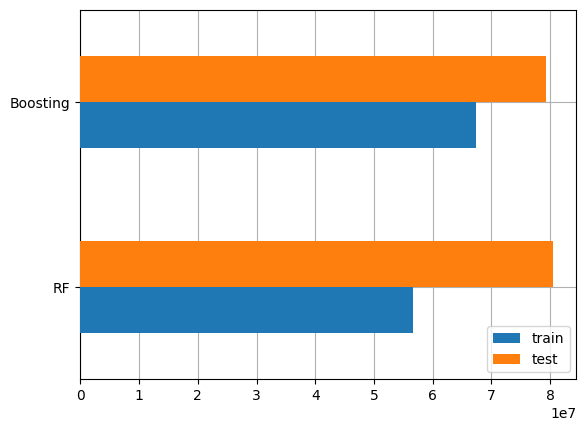

In [32]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Insight:
- Kedua model mengalami performa yang lebih baik pada data pelatihan daripada pengujian (terlihat dari MSE train < test).
- RF memiliki nilai MSE train yang lebih kecil daripada Boosting, tetapi nilai MSE test-nya sedikit lebih tinggi.
- Boosting sedikit lebih baik dalam generalisasi (karena selisih train-test lebih kecil)

### Melakukan prediksi pada satu data

In [33]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_Boosting
1860,514764,527233.9,602317.9


### Tuning Hyperparameter

In [34]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 6, 8, 10],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 8, 10]
}

# Definisikan parameter grid untuk Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [35]:
# Tuning hyperparameter dengan GridSearchCV
rf_grid_search = GridSearchCV(estimator=RF, param_grid=rf_param_grid,
                              cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search = GridSearchCV(estimator=boosting, param_grid=gb_param_grid,
                              cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit model dengan data training
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                 random_state=55),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [5, 8, 10],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [36]:
# Dapatkan model terbaik
best_rf = rf_grid_search.best_estimator_
best_gb = gb_grid_search.best_estimator_

In [37]:
# Evaluasi model terbaik
mse = pd.DataFrame(columns=['train', 'test'], index=['RF', 'Boosting'])

for name, model in [('RF', best_rf), ('Boosting', best_gb)]:
    mse.loc[name, 'train'] = mean_squared_error(y_train, model.predict(X_train)) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(y_test, model.predict(X_test)) / 1e3

In [38]:
# Tampilkan hasil
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
print(mse)

Best parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 200}
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 50}
                    train             test
RF        68022356.395777  79241589.097236
Boosting  74574722.592707  78244620.750315


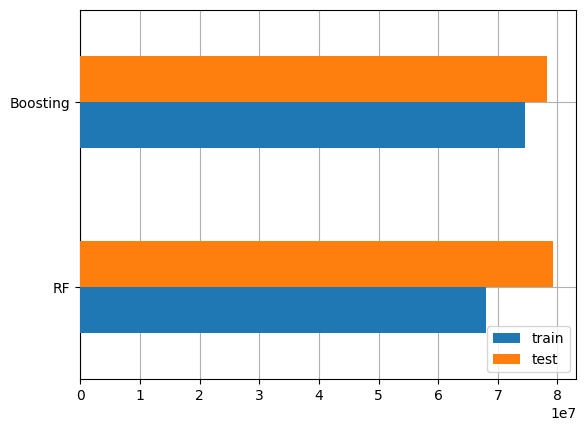

In [39]:
# Visualisasi
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
plt.show()

Insight :
- Boosting memiliki MSE yang sedikit lebih rendah dibanding RF, baik di train maupun test set.
- Perbedaan MSE train dan test relatif kecil, menunjukkan overfitting tidak terlalu parah.
- Namun, berdasarkan R² yang negatif, kedua model masih belum mampu memodelkan variansi target secara baik.

Sehingga Boosting (Algoritma Gradient Boosting) menunjukkan performa sedikit lebih baik dari RF, namun masih perlu perbaikan model atau fitur.

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi tambahan pada model yang sudah dituning
for name, model in [('RF', best_rf), ('Boosting', best_gb)]:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"{name} - MAE Train: {mean_absolute_error(y_train, y_train_pred):.2f}, MAE Test: {mean_absolute_error(y_test, y_test_pred):.2f}")
    print(f"{name} - MSE Train: {mean_squared_error(y_train, y_train_pred):.2f}, MSE Test: {mean_squared_error(y_test, y_test_pred):.2f}")
    print(f"{name} - R² Train: {r2_score(y_train, y_train_pred):.2f}, R² Test: {r2_score(y_test, y_test_pred):.2f}")

RF - MAE Train: 224827.54, MAE Test: 244792.79
RF - MSE Train: 68022356395.78, MSE Test: 79241589097.24
RF - R² Train: 0.11, R² Test: -0.02
Boosting - MAE Train: 235813.15, MAE Test: 243382.47
Boosting - MSE Train: 74574722592.71, MSE Test: 78244620750.32
Boosting - R² Train: 0.02, R² Test: -0.01


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Pastikan model_dict sudah berisi model yang dituning, misalnya:
model_dict = {'RF': best_rf, 'Boosting': best_gb}

# Inisialisasi tabel evaluasi
eval_df = pd.DataFrame(columns=['MSE', 'MAE', 'R2'], index=model_dict.keys())

# Looping setiap model
for name, model in model_dict.items():
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Simpan hasil evaluasi ke DataFrame
    eval_df.loc[name] = [mse, mae, r2]

# Tampilkan tabel evaluasi dengan pembulatan 2 angka di belakang koma
eval_df = eval_df.astype(float).round(2)
display(eval_df)


,MSE,MAE,R2
RF,7.924159e+10,244792.79,-0.02
Boosting,7.824462e+10,243382.47,-0.01


Insight:
- MSE (Mean Squared Error) : Boosting memiliki MSE sedikit lebih rendah dibandingkan RF (selisih ~0.1 miliar), menunjukkan bahwa Boosting sedikit lebih baik dalam mengurangi kesalahan kuadrat rata-rata.
- MAE (Mean Absolute Error) : Boosting memiliki MAE sedikit lebih rendah, artinya prediksinya sedikit lebih dekat ke nilai sebenarnya dibanding RF.
- R2 Score : Kedua model bernilai negatif, menunjukkan model tidak cocok dan lebih buruk dari rata-rata.

Berdasarkan hasil evaluasi, Algoritma Gradient Boosting sedikit lebih baik dalam MSE, dan MAE, keduanya masih buruk karena nilai R² negatif.

### Melakukan prediksi pada satu data

In [42]:
# Prediksi menggunakan model terbaik setelah tuning
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test[:1]}
for name, model in [('RF', rf_grid_search.best_estimator_), ('Boosting', gb_grid_search.best_estimator_)]:
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_Boosting
1860,514764,556404.2,533484.0
